In [ ]:
### Imports
from OVRImplementation import * 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine

In [2]:
data = load_wine()
X = data.data
y = data.target
features = data.feature_names

df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head(20)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


target
1    71
0    59
2    48
Name: count, dtype: int64


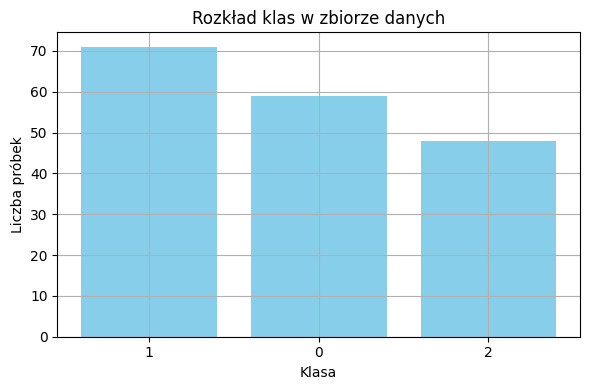

In [19]:
class_counts = df['target'].value_counts()
print(class_counts)
class_labels = ['1', '0', '2']

plt.figure(figsize=(6, 4))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Rozkład klas w zbiorze danych')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

Perceptron Accuracy: 0.917
Perceptron Precision (macro): 0.936
Perceptron Precision (micro): 0.917
Perceptron Recall (macro): 1.0
Perceptron Recall (micro): 0.917
Perceptron F1-score (macro): 0.967
Perceptron F1-score (micro): 0.917


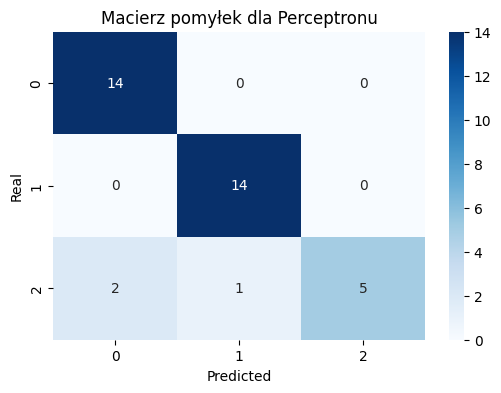

SVC Accuracy: 1.0
SVC Precision (macro): 1.0
SVC Precision (micro): 1.0
SVC Recall (macro): 1.0
SVC Recall (micro): 1.0
SVC F1-score (macro): 1.0
SVC F1-score (micro): 1.0


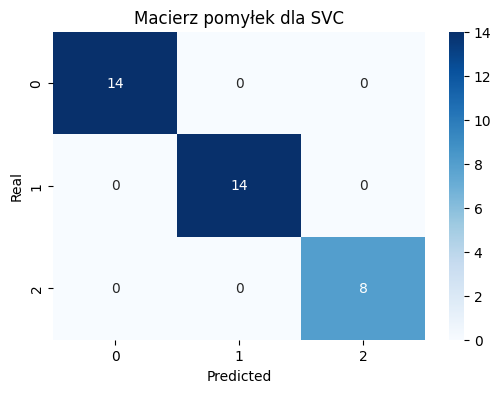

In [25]:
ovr_perceptron = OVRPerceptron(learning_rate=0.01, n_iter=500)
ovr_perceptron.fit(X_train, y_train)
y_pred = ovr_perceptron.predict(X_test)

ovr_svc = OVRSVC(kernel='linear')
ovr_svc.fit(X_train, y_train)
y_pred_svc = ovr_svc.predict(X_test)

print("Perceptron Accuracy:", round(accuracy(y_test, y_pred),3))
print("Perceptron Precision (macro):", round(precision(y_test, y_pred, average='macro'),3))
print("Perceptron Precision (micro):", round(precision(y_test, y_pred, average='micro'),3))
print("Perceptron Recall (macro):", round(recall(y_test, y_pred, average='macro'),3))
print("Perceptron Recall (micro):", round(recall(y_test, y_pred, average='micro'),3))
print("Perceptron F1-score (macro):", round(f1_score(y_test, y_pred, average='macro'),3))
print("Perceptron F1-score (micro):", round(f1_score(y_test, y_pred, average='micro'),3))

plt.figure(figsize=(6, 4))
cm_perceptron = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'])
sns.heatmap(cm_perceptron, annot=True, cmap='Blues', fmt='d')
plt.title('Macierz pomyłek dla Perceptronu')
plt.show()

print("SVC Accuracy:", round(accuracy(y_test, y_pred_svc),3))
print("SVC Precision (macro):", round(precision(y_test, y_pred_svc, average='macro'),3))
print("SVC Precision (micro):", round(precision(y_test, y_pred_svc, average='micro'),3))
print("SVC Recall (macro):", round(recall(y_test, y_pred_svc, average='macro'),3))
print("SVC Recall (micro):", round(recall(y_test, y_pred_svc, average='micro'),3))
print("SVC F1-score (macro):", round(f1_score(y_test, y_pred_svc, average='macro'),3))
print("SVC F1-score (micro):", round(f1_score(y_test, y_pred_svc, average='micro'),3))

plt.figure(figsize=(6, 4))
cm_svc = pd.crosstab(y_test, y_pred_svc, rownames=['Real'], colnames=['Predicted'])
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='d')
plt.title('Macierz pomyłek dla SVC')
plt.show()

In [6]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

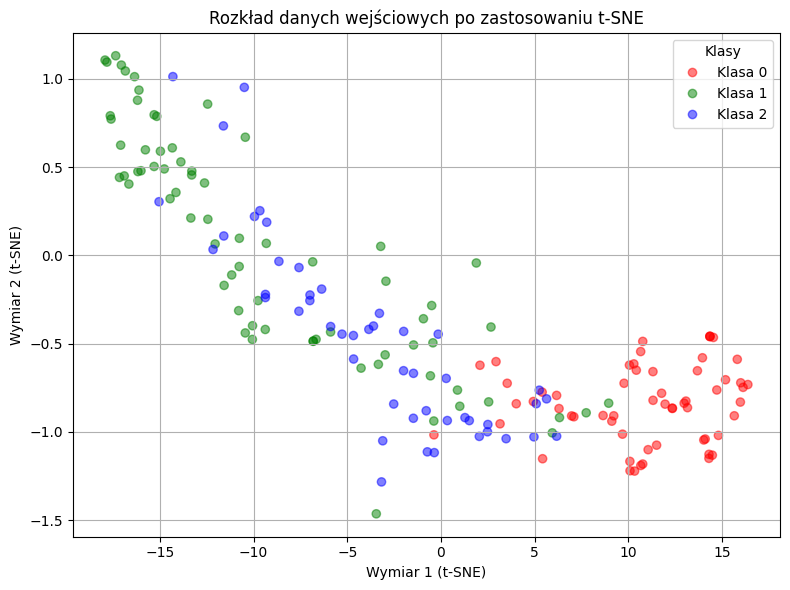

In [10]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap=ListedColormap(['red', 'green', 'blue']), alpha=0.5)
plt.title('Rozkład danych wejściowych po zastosowaniu t-SNE')
plt.xlabel('Wymiar 1 (t-SNE)')
plt.ylabel('Wymiar 2 (t-SNE)')
legend_labels = [f"Klasa {i}" for i in sorted(set(y))]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Klasy")
plt.grid(True)
plt.tight_layout()
plt.show()

Perceptron Accuracy (t-SNE): 0.806


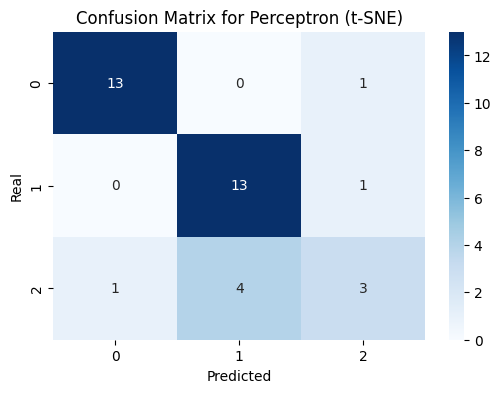

SVC Accuracy (t-SNE): 0.778


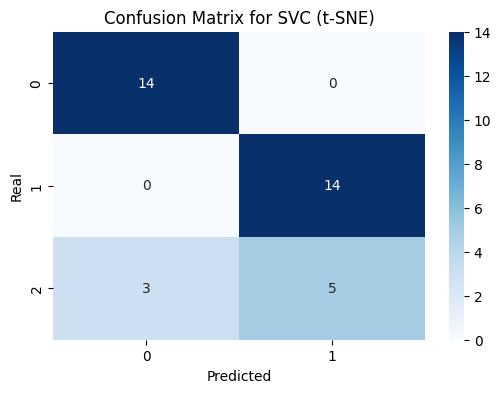

In [29]:
ovr_perceptron_tsne = OVRPerceptron(learning_rate=0.01, n_iter=500)
ovr_perceptron_tsne.fit(X_train_tsne, y_train_tsne)
y_pred_tsne = ovr_perceptron_tsne.predict(X_test_tsne)


ovr_svc_tsne = OVRSVC(kernel='linear')
ovr_svc_tsne.fit(X_train_tsne, y_train_tsne)
y_pred_svc_tsne = ovr_svc_tsne.predict(X_test_tsne)

print("Perceptron Accuracy (t-SNE):", round(accuracy(y_test_tsne, y_pred_tsne),3))
cm_perceptron_tsne = pd.crosstab(y_test_tsne, y_pred_tsne, rownames=['Real'], colnames=['Predicted'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_perceptron_tsne, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Perceptron (t-SNE)')
plt.show()

print("SVC Accuracy (t-SNE):", round(accuracy(y_test_tsne, y_pred_svc_tsne),3))
cm_svc_tsne = pd.crosstab(y_test_tsne, y_pred_svc_tsne, rownames=['Real'], colnames=['Predicted'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc_tsne, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for SVC (t-SNE)')
plt.show()



In [30]:
def plot_decision_boundary(model, X, y, title):
    h = 0.01  # siatka
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    # Rysuj punkty z etykietami klas do legendy
    for idx, color in zip(np.unique(y), ["#FF0000", "#00FF00", "#0000FF"]):
        plt.scatter(X[y == idx, 0], X[y == idx, 1],
                    c=color, edgecolor="k", label=f"Klasa {idx}")

    plt.title(title)
    plt.xlabel("Wymiar 1")
    plt.ylabel("Wymiar 2")
    plt.legend()
    plt.show()

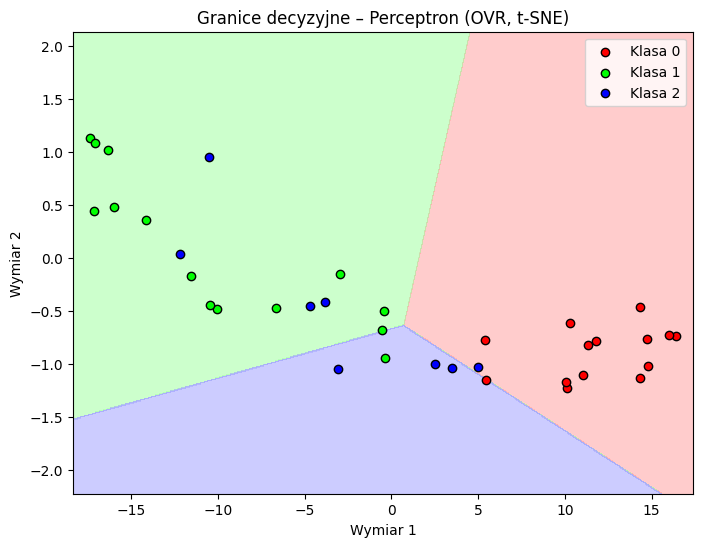

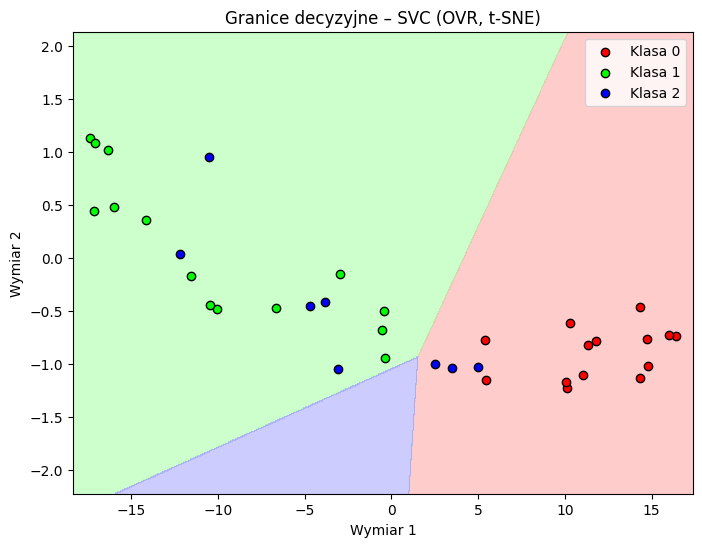

In [31]:
plot_decision_boundary(ovr_perceptron_tsne, X_test_tsne, y_test_tsne, "Granice decyzyjne – Perceptron (OVR, t-SNE)")
plot_decision_boundary(ovr_svc_tsne, X_test_tsne, y_test_tsne, "Granice decyzyjne – SVC (OVR, t-SNE)")